In [267]:
#libraries needed for this code run
!pip install bs4
!pip install pandas
!pip install requests
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [268]:
#imports libraries
#beautiful soup for pulling data out of HTML and XML files
from bs4 import BeautifulSoup
# requests to use a get request
import requests
#pandas to store data in a dataframe
import pandas as pd
#numpy to deal with nan data
import numpy as np
#re to apply regex to extract numbers from string
import re
# matplotlib for data visualization
import matplotlib.pyplot as plt
#seaborn for data visualization
import seaborn as sns

In [269]:
# Function to extract Product Title
def get_title(soup):
    try:
        # Outer Tag Object
        title = new_soup.find("h1",attrs={'class':'title-1'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.split('\n')[1].strip()+' '+title_value.split('\n')[3].strip()
        
    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Original price
def get_OriginalPrice(soup):
    try:
        
        OriginalPrice = new_soup.find("span",attrs={'class':'body-1-light-striked flex items-end mr-2 cursor-pointer'}).text.strip()

    except AttributeError:
        OriginalPrice = "Not Available"	

    return OriginalPrice    

# Function to extract Current Product Price
def get_price(soup):

    try:
        price = new_soup.find("div",attrs={'class':'text-primary'}).text.strip()

    except AttributeError:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = new_soup.find("span",attrs={'class':"ml-1 text-primary body-2-bold"}).text.strip()
    
    except AttributeError:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'class':'ml-2 body-2-bold underline _1HL64gTNKr5pbdUa5n9_1Y'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count




In [270]:
if __name__ == '__main__':

    # add your user agent 
    Headers = ({'User-Agent':#update your user agent 
    })

    # The webpage URL
    URL = "https://www.backmarket.nl/nl-nl/l/iphone/aabc736a-cb66-4ac0-a3b7-0f449781ed39?gclid=Cj0KCQjwi46iBhDyARIsAE3nVral_leWXn8KOG6hlma7u3b1tTQ2Eg6-xAYr9YJHhQsKzaQELmiwEd8aAuzaEALw_wcB"
    
    # HTTP Request
    webpage = requests.get(URL, headers=Headers)
    
    #status code 200 means our request was accepted
    print(webpage.status_code)
    
    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")
    
    # Fetch links as List of Tag Objects
    links = soup.find_all("a",attrs={'class':'focus:outline-none group md:box-border relative'})

    # Store the links
    links_list = []
        # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "Original Price":[],"Current Price":[] ,"rating":[], "reviews":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.backmarket.nl" + link, headers=Headers)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['Original Price'].append(get_OriginalPrice(new_soup))
        d['Current Price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))

    
        amazon_df = pd.DataFrame.from_dict(d)
        amazon_df['title'].replace('', np.nan, inplace=True)
        amazon_df = amazon_df.dropna(subset=['title'])
        amazon_df.to_csv("blackmarket_data.csv", header=True, index=False)

200


In [271]:
#import data from csv file
df = pd.read_csv('blackmarket_data.csv')
#Rename the dataframe columns
df.rename(columns={"title": "Product Title", "Original Price": "Original Price(€)","Current Price":"Current Price(€)","rating":"User Rating (X/5)","reviews":"Number of Reviews"},inplace=True)
#show top 10 values
df.head(10)

,Product Title,Original Price(€),Current Price(€),User Rating (X/5),Number of Reviews
0,iPhone 12 mini Simlockvrij 128 GB - Blauw,"€ 739,00 nieuw","€ 400,00",4.2/5,(9.181 reviews)
1,iPhone SE (2020) Simlockvrij 64 GB - Wit,"€ 319,00 nieuw","€ 160,00",4.2/5,(12.365 reviews)
2,iPhone 12 Simlockvrij 128 GB - Zwart,"€ 859,00 nieuw","€ 473,00",4.2/5,(17.668 reviews)
3,iPhone SE (2020) Simlockvrij 64 GB - Zwart,"€ 319,00 nieuw","€ 158,98",4.2/5,(12.363 reviews)
4,iPhone SE (2020) Simlockvrij 128 GB - Zwart,"€ 379,00 nieuw","€ 188,32",4.2/5,(12.365 reviews)
5,iPhone 11 Simlockvrij 64 GB - Zwart,"€ 589,00 nieuw","€ 316,32",4.1/5,(22.338 reviews)
6,iPhone 12 mini Simlockvrij 64 GB - Zwart,"€ 689,00 nieuw","€ 357,89",4.2/5,(9.179 reviews)
7,iPhone 12 Simlockvrij 128 GB - Zwart,"€ 859,00 nieuw","€ 473,00",4.2/5,(17.668 reviews)
8,iPhone 11 Simlockvrij 128 GB - Zwart,"€ 639,00 nieuw","€ 374,99",4.1/5,(22.346 reviews)
9,iPhone 12 mini Simlockvrij 128 GB - Blauw,"€ 739,00 nieuw","€ 400,00",4.2/5,(9.181 reviews)


In [272]:
# Functions to convert all of the string values to numeric
"""
Steps
    1) Extract the numeric part using regex or by splitting the string
    2) Convert the numeric part to float or int depending on the context
    3) Return the value
"""
def convert_Current_price_to_Numeric(x):
    numeric_part = re.sub('[^0-9,]', '', x).replace(',','.')
    float_value = float(numeric_part)
    return float_value
def convert_Original_price_to_Numeric(x):
    numeric_part = re.sub('[^0-9,]', '', x).replace(',','.')
    float_value = float(numeric_part)
    return float_value
def convert_user_rating(x):
    numeric_part = x.split('/')[0]
    float_value = float(numeric_part)
    return float_value
  
def convert_Number_fo_reviews(x):
    numeric_part = re.sub('[^0-9,]', '', x) 
    int_value= int(numeric_part)
    return int_value  

In [273]:
#Pandas apply function to use the functions defined earlies for extractic numeric values
df['Current Price(€)']=df['Current Price(€)'].apply(convert_Current_price_to_Numeric)
df['Original Price(€)']=df['Original Price(€)'].apply(convert_Original_price_to_Numeric)
df['User Rating (X/5)']=df['User Rating (X/5)'].apply(convert_user_rating)
df['Number of Reviews']=df['Number of Reviews'].apply(convert_Number_fo_reviews)


In [274]:
# top 10 values
df.head()


,Product Title,Original Price(€),Current Price(€),User Rating (X/5),Number of Reviews
0,iPhone 12 mini Simlockvrij 128 GB - Blauw,739.0,400.00,4.2,9181
1,iPhone SE (2020) Simlockvrij 64 GB - Wit,319.0,160.00,4.2,12365
2,iPhone 12 Simlockvrij 128 GB - Zwart,859.0,473.00,4.2,17668
3,iPhone SE (2020) Simlockvrij 64 GB - Zwart,319.0,158.98,4.2,12363
4,iPhone SE (2020) Simlockvrij 128 GB - Zwart,379.0,188.32,4.2,12365


In [275]:
#data type of the columns
print(df.dtypes)

Product Title         object
Original Price(€)    float64
Current Price(€)     float64
User Rating (X/5)    float64
Number of Reviews      int64
dtype: object


In [276]:
#summary of data 
df.describe()

,Original Price(€),Current Price(€),User Rating (X/5),Number of Reviews
count,33.000000,33.000000,33.000000,33.000000
mean,671.424242,369.336061,4.190909,12274.454545
std,220.652871,148.366553,0.112815,6476.089339
min,299.000000,130.390000,3.900000,1770.000000
25%,559.000000,302.000000,4.100000,9179.000000
50%,689.000000,374.420000,4.200000,12363.000000
75%,809.000000,473.000000,4.200000,17665.000000
max,1159.000000,822.250000,4.500000,22350.000000


In [277]:
df['Price drop']=df['Original Price(€)']-df['Current Price(€)']

/var/folders/4g/qxn2t9595qx4_14vcb3q1sdc0000gn/T/ipykernel_677/2035990503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=df.corr()


<AxesSubplot: >

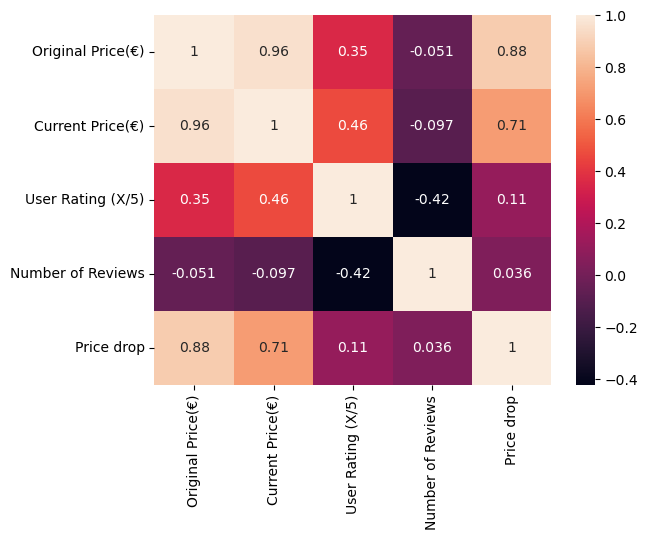

In [278]:
corelation=df.corr()
sns.heatmap(corelation,annot=True)